### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 1.3 
#### Stochastic integration
##### GNABEYEU MBIADA Emmanuel

The present problem set is attached to Chapters 5 and 6 of the lectures notes. All implementations should be run with the value T = 2. For a positive integer n, we denote ∆T := T/n, $t^n_i := i ∆T, i = 0,...,n.$ We consider a Brownian motion W, and we denote $ ∆W_{t^n_i} :=W_{t^n_i} −W_{t^n_{i−1}}, i=1,...,n.$

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

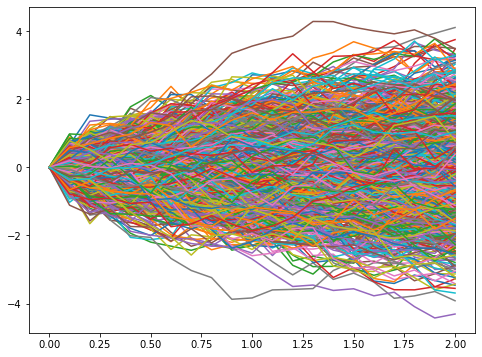

In [26]:
def forward_simul_sample(n,d):
    # increments
    dB= np.sqrt(dt) * np.random.normal(size=(n,d))
    B0= np.zeros(shape=(1,d))
    B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    return B

n=20
M=1000
T=2
times = np.linspace(0,T,n+1)
dt=times[1]-times[0]

W=forward_simul_sample(n,M)
plt.figure(figsize=(8,6))
plt.plot(times,W)
plt.show()

In [27]:
Wp=pd.DataFrame(W,columns=[f'Sample_{i+1}' for i in range(1000)])
delta_W=pd.DataFrame(np.diff(W, axis=0),columns=[f'Sample_{i+1}' for i in range(1000)])

In [28]:
I_n=np.cumsum(Wp.iloc[:-1]*delta_W,axis=0).iloc[-1] # ou np.sum(Wp.iloc[:-1]*delta_W,axis=0)
rv_1=0.5*Wp.iloc[-1]**2-I_n
rv_1

Sample_1       0.663620
Sample_2       1.193243
Sample_3       1.027495
Sample_4       0.590990
Sample_5       0.644567
                 ...   
Sample_996     0.486086
Sample_997     0.995258
Sample_998     0.882229
Sample_999     1.323929
Sample_1000    0.443926
Length: 1000, dtype: float64

In [29]:
J_n=np.cumsum(Wp.iloc[1:].reset_index(drop=True)*delta_W,axis=0).iloc[-1] # ou np.sum(Wp.iloc[1:].reset_index(drop=True)*delta_W,axis=0)
rv_2=0.5*Wp.iloc[-1]**2-J_n
rv_2

Sample_1      -0.663620
Sample_2      -1.193243
Sample_3      -1.027495
Sample_4      -0.590990
Sample_5      -0.644567
                 ...   
Sample_996    -0.486086
Sample_997    -0.995258
Sample_998    -0.882229
Sample_999    -1.323929
Sample_1000   -0.443926
Length: 1000, dtype: float64

In [30]:
K_n=np.cumsum(((Wp.shift()+Wp)/2).iloc[1:].reset_index(drop=True)*delta_W,axis=0).iloc[-1]
rv_3=0.5*Wp.iloc[-1]**2-K_n
rv_3

Sample_1       2.220446e-16
Sample_2       2.220446e-16
Sample_3       1.457168e-16
Sample_4      -3.469447e-17
Sample_5      -5.551115e-17
                   ...     
Sample_996     1.110223e-16
Sample_997     1.110223e-16
Sample_998     1.665335e-16
Sample_999     5.551115e-17
Sample_1000    0.000000e+00
Length: 1000, dtype: float64

In [31]:
a=0.5*Wp.iloc[-1]**2-I_n
b=0.5*Wp.iloc[-1]**2-J_n
c=0.5*Wp.iloc[-1]**2-K_n

(b) Compute the corresponding sample means, and comment on the results.

In [32]:
mean_rv1=np.mean(rv_1)
mean_rv2=np.mean(rv_2)
mean_rv3=np.mean(rv_3)
print(mean_rv1)
print(mean_rv2)
print(mean_rv3)

0.9918945165756603
-0.9918945165756605
5.649611820001657e-19


**Comments:** we know that the stochastic integral given has as value by ito formula $1/2( W_T^2-T)$, so $1/2( W_T^2-I_n)$ i.e. an approximation of this integral must converge to T/2,
By that, the formular 1 is a good definition of this stochastic integration, whereas those of formulae 2 and 3 (which are diverging) are not. 

It is quite normal with regard to the left point assumption(mesurability with regard to the canonical filtration) in the definition of the stochastic integration on the one hand and on the other hand, the fact that the stochastic integral given is a random variable, and as some of the different approximation formulas
are Riemann/Stieltjes integral, their approximation with regards to the Riemann method don't have a sense for random variable.

(c) Vary the value of n from 10 to 20, and provide a graph of the resulting sample means, together with the corresponding confidence intervals.

In [33]:
def Approximate_Integrale(n):
    W=forward_simul_sample(n,M)
    Wp=pd.DataFrame(W,columns=[f'Sample_{i+1}' for i in range(1000)])
    delta_W=pd.DataFrame(np.diff(W, axis=0),columns=[f'Sample_{i+1}' for i in range(1000)])
    I=np.sum(Wp.iloc[:-1]*delta_W,axis=0)
    J=np.sum(Wp.iloc[1:].reset_index(drop=True)*delta_W,axis=0)
    K=np.sum(((Wp.shift()+Wp)/2).iloc[1:].reset_index(drop=True)*delta_W,axis=0)
    return np.array([np.mean(0.5*Wp.iloc[-1]**2-I), np.mean(0.5*Wp.iloc[-1]**2-J),np.mean(0.5*Wp.iloc[-1]**2-K)]),np.array([np.var(0.5*Wp.iloc[-1]**2-I), np.var(0.5*Wp.iloc[-1]**2-J),np.var(0.5*Wp.iloc[-1]**2-K)])



The 95% confidence interval has half-width given by ME=$1.96*\frac{\sigma_M}{\sqrt{M}}$

In [34]:
M=1000
inter=[n for n in range(10,21,1)]
LCL=[]
UCL=[]
LCL1=[]
UCL1=[]
LCL2=[]
UCL2=[]
mean=pd.DataFrame()
for n in inter:
    a,b=Approximate_Integrale(n)
    coef = pd.DataFrame(a).T
    coef.columns=[f'mean_{i+1}' for i in range(3)] 
    mean=pd.concat([mean, coef])
    bs_std = np.sqrt(b[2]/M)
    bs_band_size = 1.96*bs_std 

    UCL.append(coef['mean_3'].values[0]+bs_band_size)
    LCL.append(coef['mean_3'].values[0]-bs_band_size)
    UCL1.append(coef['mean_1'].values[0]+1.96*np.sqrt(b[0]/M))
    LCL1.append(coef['mean_1'].values[0]-1.96*np.sqrt(b[0]/M))
    UCL2.append(coef['mean_2'].values[0]+1.96*np.sqrt(b[1]/M))
    LCL2.append(coef['mean_2'].values[0]-1.96*np.sqrt(b[1]/M))
mean['iter']=inter
#mean.set_index('iter')
mean

,mean_1,mean_2,mean_3,iter
0,0.493199,-0.493199,-1.299104e-18,10
0,0.556801,-0.556801,3.680713e-18,11
0,0.611941,-0.611941,2.414871e-19,12
0,0.658981,-0.658981,1.605774e-19,13
0,0.706407,-0.706407,-6.022995e-18,14
0,0.745273,-0.745273,-1.173920e-19,15
0,0.789697,-0.789697,4.141612e-18,16
0,0.841873,-0.841873,1.360733e-18,17
0,0.902426,-0.902426,9.786753e-18,18
0,0.958991,-0.958991,1.412170e-17,19


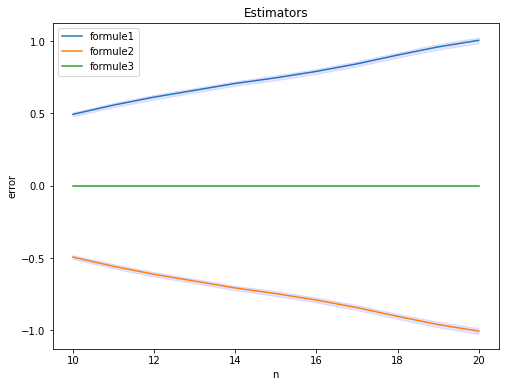

In [35]:
plt.figure(figsize=(8,6))
plt.plot(mean['iter'],mean['mean_1'].values, label='formule1')
plt.plot(mean['iter'],mean['mean_2'].values,label='formule2')
plt.plot(mean['iter'],mean['mean_3'].values,label='formule3')
plt.fill_between(mean['iter'], UCL1, LCL1, color='b', alpha=.1)
plt.fill_between(mean['iter'], UCL2, LCL2, color='b', alpha=.1)
#plt.plot(mean['iter'],UCL1,label='up')
#plt.plot(mean['iter'],LCL1,label='down')
plt.fill_between(mean['iter'], UCL, LCL, color='b', alpha=.1)
plt.title("Estimators")
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.show()

### Figures with confident intervalls

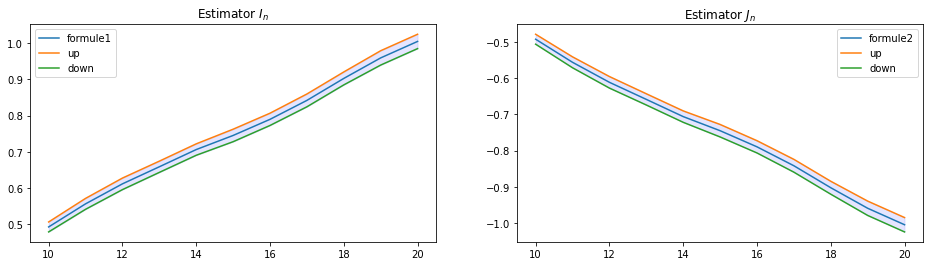

In [36]:
plt.figure(figsize=(16,4))
#plot 1: 
plt.subplot(1, 2, 1)
#plt.scatter(times[-1],mean[-1])
plt.plot(mean['iter'],mean['mean_1'].values, label='formule1')
plt.plot(mean['iter'],UCL1,label='up')
plt.plot(mean['iter'],LCL1,label='down')
plt.fill_between(mean['iter'], UCL1, LCL1, color='b', alpha=.1)
plt.title("Estimator $%s$" % "I_n")
plt.legend()
#plot 2: 

plt.subplot(1, 2, 2)
plt.plot(mean['iter'],mean['mean_2'].values, label='formule2')
plt.plot(mean['iter'],UCL2,label='up')
plt.plot(mean['iter'],LCL2,label='down')
plt.fill_between(mean['iter'], UCL2, LCL2, color='b', alpha=.1)
plt.title("Estimator $%s$" % "J_n")
plt.legend()

plt.show()

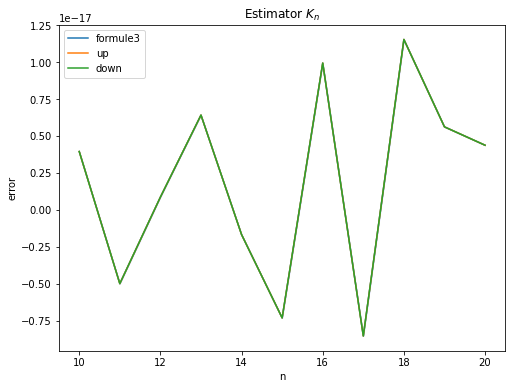

In [13]:
plt.figure(figsize=(8,6))
plt.plot(mean['iter'],mean['mean_3'].values,label='formule3')
plt.plot(mean['iter'],UCL,label='up')
plt.plot(mean['iter'],LCL,label='down')

plt.fill_between(mean['iter'], UCL, LCL, color='b', alpha=.1)
plt.title("Estimator $%s$" % "K_n")
plt.xlabel('n')
plt.ylabel('error')
plt.legend()
plt.show()

2. Address the previous questions with the random variables $A_n, B_n$ and $C_n$
We are now computing approximations for the stochastic integral
$\int_{0}^{T} e^s \, \mathrm{d}w_s$

In [14]:
def Approximate_Integrale2(n):
    W=forward_simul_sample(n,M)
    Wp=pd.DataFrame(W,columns=[f'Sample_{i+1}' for i in range(1000)])
    delta_W=pd.DataFrame(np.diff(W, axis=0),columns=[f'Sample_{i+1}' for i in range(1000)])
    
    times = np.linspace(0,T,n+1)
    times=pd.Series(times)
    weight=np.exp(times)
    weight2=np.exp((times.shift()+times)/2).iloc[1:].reset_index(drop=True)
    
    I=np.sum(delta_W.mul(weight.iloc[:-1], axis = 0),axis=0)
    J=np.sum(delta_W.mul(weight.iloc[1:].reset_index(drop=True), axis = 0),axis=0)
    K=np.sum(delta_W.mul(weight2, axis = 0),axis=0)
    
    return Wp,I,J,K

(b) Compute the corresponding sample means, and comment on the results.

In [15]:
# FOR N=10
Wp,I,J,K=Approximate_Integrale2(10)
#mean_=np.array([np.mean(0.5*Wp.iloc[-1]**2-I), np.mean(0.5*Wp.iloc[-1]**2-J),np.mean(0.5*Wp.iloc[-1]**2-K)])
mean_=np.array([np.mean(I), np.mean(J),np.mean(K)])
means=pd.DataFrame(mean_).T
means.columns=[f'mean_{i+1}' for i in range(3)]
means

,mean_1,mean_2,mean_3
0,0.090972,0.111113,0.100539


(c) Vary the value of n from 10 to 20, and provide a graph of the resulting sample means, together with the corresponding confidence intervals.

In [16]:
W_T=np.sqrt(0.5*(np.exp(2*T)-1)) * np.random.normal(size=(1,1000)).reshape(-1)
W_T.shape

(1000,)

In [17]:
inter=[n for n in range(10,21,1)]
mean=pd.DataFrame()
lcl=[]
ulc=[]
lcl1=[]
ulc1=[]
lcl2=[]
ulc2=[]
for n in inter:
    wp,I,J,K=Approximate_Integrale2(n)
    #a=np.array([np.mean(0.5*Wp.iloc[-1]**2-I), np.mean(0.5*Wp.iloc[-1]**2-J),np.mean(0.5*Wp.iloc[-1]**2-K)])
    a=np.array([np.mean(I), np.mean(J),np.mean(K)])
    coef = pd.DataFrame(a).T
    coef.columns=[f'mean_{i+1}' for i in range(3)] 
    mean=pd.concat([mean, coef])
    
    bs_std = np.var(K)/np.sqrt(M)
    bs_band_size = 1.96*bs_std 

    ulc.append(coef['mean_3'].values[0]+bs_band_size)
    lcl.append(coef['mean_3'].values[0]-bs_band_size)
    ulc1.append(coef['mean_1'].values[0]+1.96*np.sqrt(np.var(I)/M))
    lcl1.append(coef['mean_1'].values[0]-1.96*np.sqrt(np.var(I)/M))
    ulc2.append(coef['mean_2'].values[0]+1.96*np.sqrt(np.var(J)/M))
    lcl2.append(coef['mean_2'].values[0]-1.96*np.sqrt(np.var(J)/M))
mean['iter']=inter
#mean.set_index('iter')
mean

,mean_1,mean_2,mean_3,iter
0,0.087957,0.107431,0.097207,10
0,0.003741,0.004487,0.004098,11
0,0.054741,0.064669,0.059498,12
0,-0.035023,-0.040848,-0.037824,13
0,0.074546,0.085994,0.080065,14
0,-0.105417,-0.120453,-0.112684,15
0,0.202834,0.229841,0.215915,16
0,0.107567,0.120996,0.114084,17
0,0.015588,0.017420,0.016479,18
0,-0.099070,-0.110067,-0.104424,19


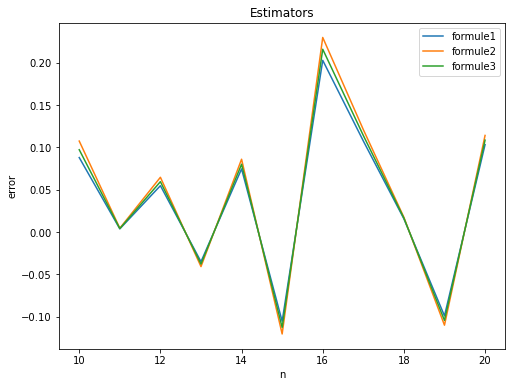

In [18]:
plt.figure(figsize=(8,6))
plt.plot(mean['iter'],mean['mean_1'].values, label='formule1')
plt.plot(mean['iter'],mean['mean_2'].values,label='formule2')
plt.plot(mean['iter'],mean['mean_3'].values,label='formule3')
plt.xlabel('n')
plt.ylabel('error')
plt.title("Estimators")
plt.legend()
plt.show()

**comments:** The results for these approximations are close to each other since it is the stochastic integral of a deterministic function s⟼$e^s$

#### With confident intervalls, we have:

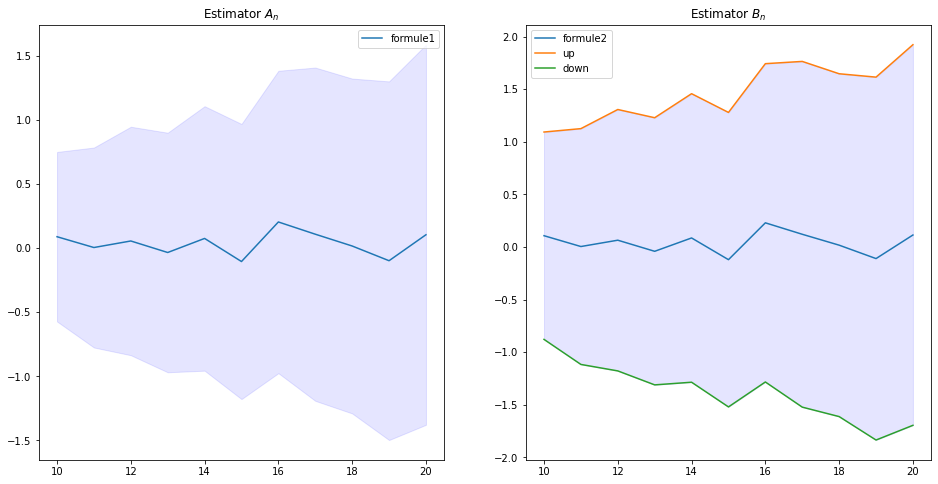

In [19]:
plt.figure(figsize=(16,8))
#plot 1:
plt.subplot(1, 2, 1)
#plt.scatter(times[-1],mean[-1])
plt.plot(mean['iter'],mean['mean_1'].values, label='formule1')
#plt.plot(mean['iter'],ulc1,label='up')
#plt.plot(mean['iter'],lcl1,label='down')
plt.fill_between(mean['iter'], ulc1, lcl1, color='b', alpha=.1)
plt.title("Estimator $%s$" % "A_n")
plt.legend()
#plot 2: 

plt.subplot(1, 2, 2)
plt.plot(mean['iter'],mean['mean_2'].values, label='formule2')
plt.plot(mean['iter'],ulc2,label='up')
plt.plot(mean['iter'],lcl2,label='down')
plt.fill_between(mean['iter'], ulc2, lcl2, color='b', alpha=.1)
plt.title("Estimator $%s$" % "B_n")
plt.legend()

plt.show()

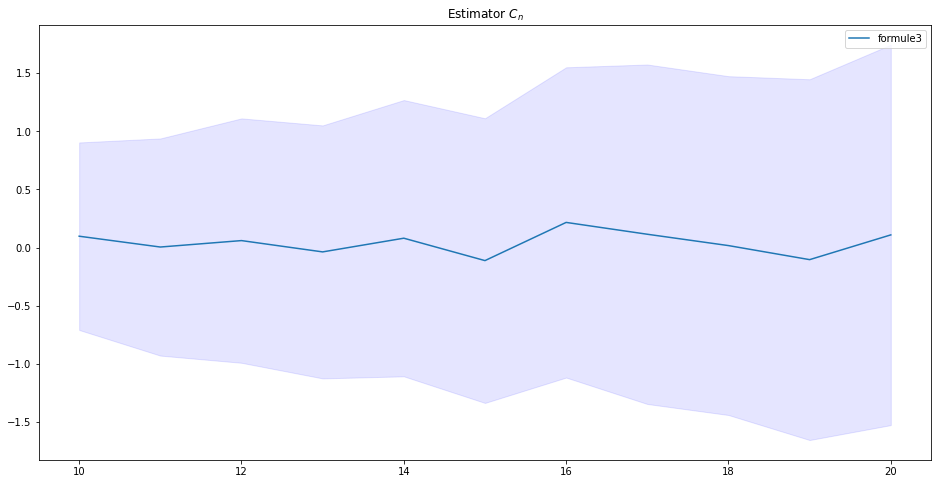

In [20]:
plt.figure(figsize=(16,8))

plt.plot(mean['iter'],mean['mean_3'].values, label='formule3')
#plt.plot(mean['iter'],ulc1,label='up')
#plt.plot(mean['iter'],lcl1,label='down')
plt.fill_between(mean['iter'], ulc, lcl, color='b', alpha=.1)
plt.title("Estimator $%s$" % "C_n")
plt.legend()

**Comments:** These formulae are bad approximation of the stochastic integral given in the preamble

3. We now consider the random variables $A_n$ := $sin(W_T) + \frac{1}{2n} \sum_{i = 1}^{n} sin(W_{t^n_{i−1}}) $


The goal here is to approximate the integral $\int_{0}^{T} sin(W_s) \, \mathrm{d}s$, still a random variable.

(a) Simulate a sample of M = 1000 copies of $A_n$, and plot the corresponding sample mean, with the appropriate confidence interval, as a function of n ∈ {10,...,200}.

In [21]:
def Simulate_A_n(n):
    W=forward_simul_sample(n,M)
    Wp=pd.DataFrame(W,columns=[f'Sample_{i+1}' for i in range(1000)])
    
    A=np.sin(Wp.iloc[-1]) + np.sum(np.sin(Wp.iloc[:-1]),axis=0)/(2*n)
    
    return A

In [22]:
n=10
A=Simulate_A_n(n)

In [23]:
A

Sample_1      -0.244248
Sample_2      -0.938167
Sample_3      -1.276708
Sample_4       0.181169
Sample_5       1.085041
                 ...   
Sample_996    -1.076192
Sample_997     0.114406
Sample_998    -0.659510
Sample_999    -0.242627
Sample_1000   -0.726302
Length: 1000, dtype: float64

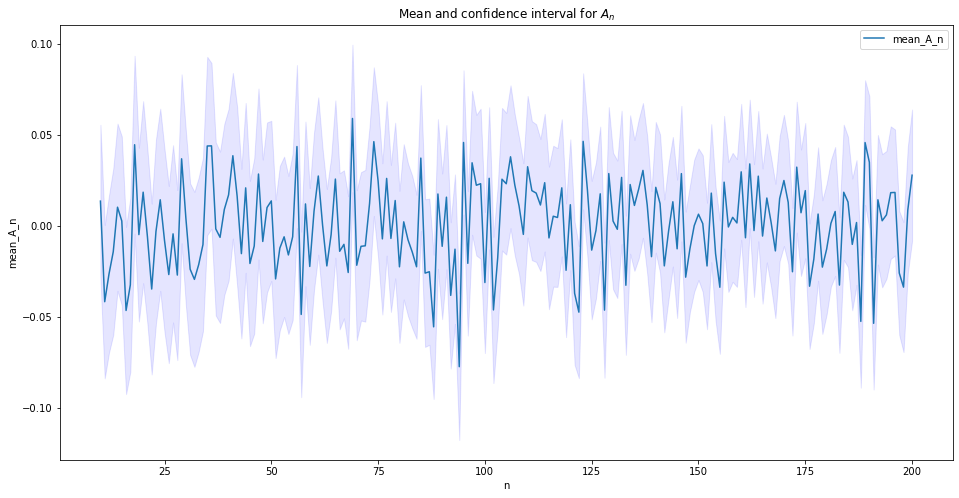

In [24]:
M=1000
inter=[n for n in range(10,201,1)]
m=[]
UCL5=[]
LCL5=[]
for n in inter:
    A=Simulate_A_n(n)
    m.append(np.mean(A))
    bs_std = np.sqrt(np.var(A)/M)
    bs_band_size = 1.96*bs_std 

    UCL5.append(np.mean(A)+bs_band_size)
    LCL5.append(np.mean(A)-bs_band_size)
    
plt.figure(figsize=(16,8))
plt.plot(inter,m, label='mean_A_n')
plt.xlabel('n')
plt.ylabel('mean_A_n')
plt.fill_between(inter, UCL5, LCL5, color='b', alpha=.1)
plt.title("Mean and confidence interval for $A_n$")
plt.legend()
plt.show()

(b) Comment the graph with appropriate justification.

Seing the formular given, one can deduce that, it is the integral approximation of a **martingale of mean 0.**
why ?
In fact, the integral $A_n$'s value oscillates around 0 wrt n. 

And we have, $\mathbb{E}[A]= \int_{0}^{T} \mathbb{E}[sin(W_s)] \, \mathrm{d}s$

Applying Fubini's theorem, we have $\mathbb{E}[sin(W_s)]=Im(\mathbb{E}[e^{i*W_s}])=Im(\mathbb{E}[e^{i*\sqrt{s}*\mathcal{N}(0,\,1)}])=Im(e^{-s^2/2})$ by the definition of a browmian motion and the Laplace Transform of a gaussian.


Thus $\mathbb{E}[sin(W_s)]=0$ and we have $\mathbb{E}[A]=0$